# Load and Visualize a myoSuite model
In this notebook is shown how to load a model and visualize it

In [1]:
from myosuite.utils import gym
import skvideo.io
import numpy as np
import os

/home/jialuyu/.local/lib/python3.10/site-packages/mujoco_py/builder.py:1: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils
/home/jialuyu/.local/lib/python3.10/site-packages/mujoco_py/builder.py:9: DeprecationWarning: The distutils.sysconfig module is deprecated, use sysconfig instead
  from distutils.sysconfig import customize_compiler
/usr/lib/python3/dist-packages/pythran/config.py:8: DeprecationWarning: 

  `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
  of the deprecation of `distutils` itself. It will be removed for
  Python >= 3.12. For older Python versions it will remain present.
  It is recommended to use `setuptools < 60.0` for those Python versions.
  For more details, see:
    https://numpy.org/devdocs/reference/distutils_status_migration.html 


  import numpy.distutils.system_info as numpy_sys
/usr/lib/python3/dist-packages/pythran/

Exception: 
You appear to be missing MuJoCo.  We expected to find the file here: /home/jialuyu/.mujoco/mujoco210

This package only provides python bindings, the library must be installed separately.

Please follow the instructions on the README to install MuJoCo

    https://github.com/openai/mujoco-py#install-mujoco

Which can be downloaded from the website

    https://www.roboti.us/index.html


In [ ]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 400):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video autoplay width={video_width} controls><source src="{video_url}"></video>""")
 

In [ ]:
env = gym.make('myoElbowPose1D6MRandom-v0')
print('List of cameras available', [env.sim.model.camera(i).name for i in range(env.sim.model.ncam)])
env.reset()
frames = []
for _ in range(100):
    frame = env.sim.renderer.render_offscreen(
                        width=400,
                        height=400,
                        camera_id=0)
    frames.append(frame)
    env.step(env.action_space.sample()) # take a random action
env.close()

os.makedirs('videos', exist_ok=True)
# make a local copy
skvideo.io.vwrite('videos/temp.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})

# show in the notebook
show_video('videos/temp.mp4')

/home/jialuyu/.local/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sim to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sim` for environment variables or `env.get_wrapper_attr('sim')` that will search the reminding wrappers.
  logger.warn(


List of cameras available ['side_view', 'front_view']


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


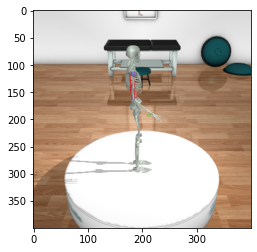

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.imshow(frame)